
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the Dow Jones Industrial Average.  Construct portfolios from the 30 stocks in the DJIA and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,618.87,96.28,96.70,7.14,6.12,22.03,9.59,32.48,7.14,0.22
1,AXP,American Express,US Stocks:Financials,125.67,91.67,57.22,23.49,20.73,23.10,12.28,27.16,23.49,0.86
2,AMGN,Amgen,US Stocks:Healthcare,216.36,-31.29,-6.54,12.14,8.14,18.38,6.56,24.98,12.14,0.49
3,AMZN,Amazon,US Stocks:Consumer Discretionary,135.58,140.65,49.48,19.62,20.73,21.45,10.13,34.53,19.62,0.57
4,AAPL,Apple,US Stocks:Technology,-54.92,4.51,26.12,14.52,25.11,29.77,18.97,26.23,14.52,0.55
5,BA,Boeing,US Stocks:Industrials,-0.20,77.27,-11.93,-3.14,-10.92,26.63,14.02,40.93,-3.14,-128.52
6,CAT,Caterpillar,US Stocks:Industrials,37.63,-14.34,23.72,22.48,24.75,32.45,20.01,36.33,22.48,0.62
7,CVX,Chevron,US Stocks:Energy,65.31,6.04,3.66,8.09,10.89,23.08,16.78,28.30,8.09,0.29
8,CSCO,Cisco,US Stocks:Technology,43.91,44.18,19.66,6.36,8.18,21.09,17.49,20.94,6.36,0.30
9,KO,Coca-Cola,US Stocks:Consumer Staples,31.95,-9.40,9.21,5.25,5.39,19.70,9.95,14.14,5.25,0.37


In [6]:
# add fundamental columns
df = bb.add_fundamental_columns(df)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio,companyName,Previous Close,Trailing PE,Dividend Yield,Market Cap
0,MMM,3M,US Stocks:Industrials,618.87,96.28,96.70,7.14,6.12,22.03,9.59,32.48,7.14,0.22,3M Company,154.40,20.96,1.99,82107.33
1,AXP,American Express,US Stocks:Financials,125.67,91.67,57.22,23.49,20.73,23.10,12.28,27.16,23.49,0.86,American Express Company,318.95,22.68,0.86,222849.91
2,AMGN,Amgen,US Stocks:Healthcare,216.36,-31.29,-6.54,12.14,8.14,18.38,6.56,24.98,12.14,0.49,Amgen Inc.,284.02,36.50,3.34,153422.68
3,AMZN,Amazon,US Stocks:Consumer Discretionary,135.58,140.65,49.48,19.62,20.73,21.45,10.13,34.53,19.62,0.57,"Amazon.com, Inc.",234.64,50.79,0.00,2499205.14
4,AAPL,Apple,US Stocks:Technology,-54.92,4.51,26.12,14.52,25.11,29.77,18.97,26.23,14.52,0.55,Apple Inc.,237.59,37.46,0.42,3545215.80
5,CAT,Caterpillar,US Stocks:Industrials,37.63,-14.34,23.72,22.48,24.75,32.45,20.01,36.33,22.48,0.62,"Caterpillar, Inc.",374.98,16.84,1.43,179331.97
6,CVX,Chevron,US Stocks:Energy,65.31,6.04,3.66,8.09,10.89,23.08,16.78,28.30,8.09,0.29,Chevron Corporation,156.32,15.33,4.17,261828.46
7,CSCO,Cisco,US Stocks:Technology,43.91,44.18,19.66,6.36,8.18,21.09,17.49,20.94,6.36,0.30,"Cisco Systems, Inc.",60.47,26.01,2.64,241355.24
8,KO,Coca-Cola,US Stocks:Consumer Staples,31.95,-9.40,9.21,5.25,5.39,19.70,9.95,14.14,5.25,0.37,Coca-Cola Company (The),64.05,26.34,3.06,273459.15
9,DIS,Disney,US Stocks:Communication Services,27.42,94.75,17.69,-5.02,-3.72,14.85,8.16,35.09,-5.02,-176.15,Walt Disney Company (The),113.43,41.57,0.82,204464.49


In [7]:
# rank
rank = bb.rank(df, rank_by='Dividend Yield')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio,companyName,Previous Close,Trailing PE,Dividend Yield,Market Cap
26,VZ,Verizon,US Stocks:Communication Services,15.83,-11.49,-0.99,-2.12,-2.94,17.25,10.28,22.05,-2.12,-46.75,Verizon Communications Inc.,39.47,9.51,6.92,165817.32
6,CVX,Chevron,US Stocks:Energy,65.31,6.04,3.66,8.09,10.89,23.08,16.78,28.30,8.09,0.29,Chevron Corporation,156.32,15.33,4.17,261828.46
14,JNJ,Johnson & Johnson,US Stocks:Healthcare,104.58,-15.76,-1.14,-0.48,3.17,23.34,11.91,15.44,-0.48,-7.41,Johnson & Johnson,152.87,26.23,3.35,366319.37
2,AMGN,Amgen,US Stocks:Healthcare,216.36,-31.29,-6.54,12.14,8.14,18.38,6.56,24.98,12.14,0.49,Amgen Inc.,284.02,36.50,3.34,153422.68
17,MRK,Merck,US Stocks:Healthcare,5.63,-14.96,-16.56,10.82,6.95,19.45,11.63,20.14,10.82,0.54,"Merck & Company, Inc.",98.95,20.67,3.28,249979.01
8,KO,Coca-Cola,US Stocks:Consumer Staples,31.95,-9.40,9.21,5.25,5.39,19.70,9.95,14.14,5.25,0.37,Coca-Cola Company (The),64.05,26.34,3.06,273459.15
13,IBM,IBM,US Stocks:Technology,499.48,124.97,41.02,29.55,19.32,46.24,6.88,24.07,29.55,1.23,International Business Machines,258.27,39.83,2.92,236431.72
7,CSCO,Cisco,US Stocks:Technology,43.91,44.18,19.66,6.36,8.18,21.09,17.49,20.94,6.36,0.30,"Cisco Systems, Inc.",60.47,26.01,2.64,241355.24
21,PG,Procter & Gamble,US Stocks:Consumer Staples,-0.63,-0.40,8.00,4.19,8.31,21.39,13.20,17.86,4.19,0.23,Procter & Gamble Company (The),167.41,26.47,2.49,389221.65
16,MCD,McDonald's,US Stocks:Consumer Staples,-3.67,-6.05,0.36,7.36,9.03,15.11,7.32,17.85,7.36,0.41,McDonald's Corporation,290.32,25.32,2.45,206888.21


### Sample Portfolios
Format 'Investment option': weight

In [8]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [9]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [10]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [11]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [12]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Annual Returns'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [13]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,VZ,CVX,JNJ,AMGN,MRK,KO,IBM,CSCO,PG,MCD,...,GS,NKE,HON,JPM,MMM,TRV,UNH,CAT,WMT,Ranked Portfolio
Annual Returns,-2.12,8.09,-0.48,12.14,10.82,5.25,29.55,6.36,4.19,7.36,...,26.55,-17.76,5.91,25.23,7.14,15.83,7.31,22.48,31.30,10.34
Std Dev,22.05,28.30,15.44,24.98,20.14,14.14,24.07,20.94,17.86,17.85,...,28.34,31.88,23.35,27.12,32.48,21.38,19.17,36.33,20.28,17.96
Sharpe Ratio,-46.75,0.29,-7.41,0.49,0.54,0.37,1.23,0.30,0.23,0.41,...,0.94,-566.19,0.25,0.93,0.22,0.74,0.38,0.62,1.54,0.58
Weight,0.16,0.16,0.02,0.02,0.02,0.02,0.09,0.09,0.02,0.02,...,0.04,0.04,0.05,0.04,0.05,0.04,0.02,0.05,0.04,1.00
Worst Typical Down Year,-46.22,-48.51,-31.36,-37.82,-29.46,-23.03,-18.59,-35.52,-31.53,-28.34,...,-30.13,-81.52,-40.79,-29.01,-57.82,-26.93,-31.03,-50.18,-9.26,-25.59
Black Swan,-68.27,-76.81,-46.80,-62.80,-49.60,-37.17,-42.66,-56.46,-49.39,-46.19,...,-58.47,-113.40,-64.14,-56.13,-90.30,-48.31,-50.20,-86.51,-29.54,-43.55


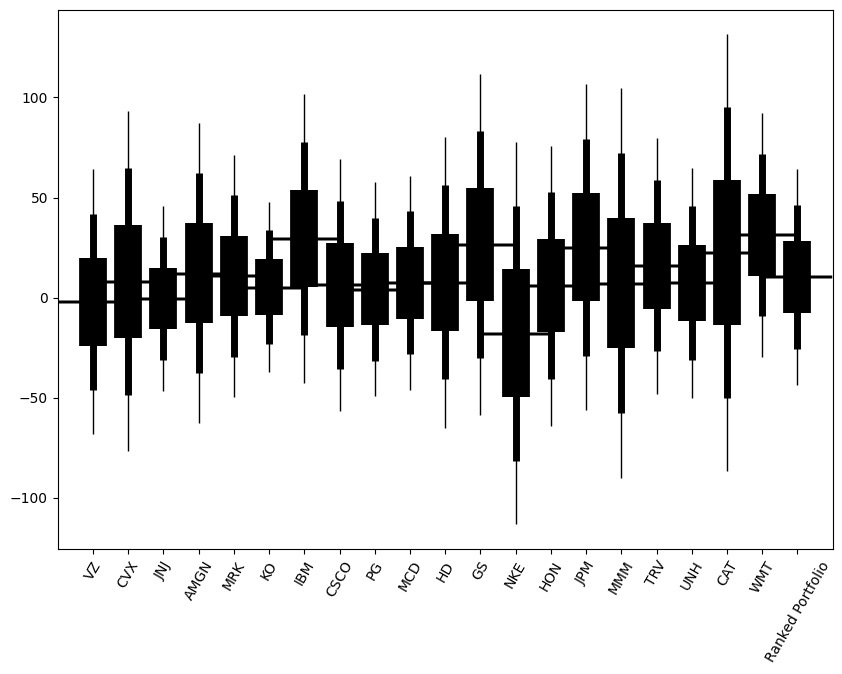

In [14]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

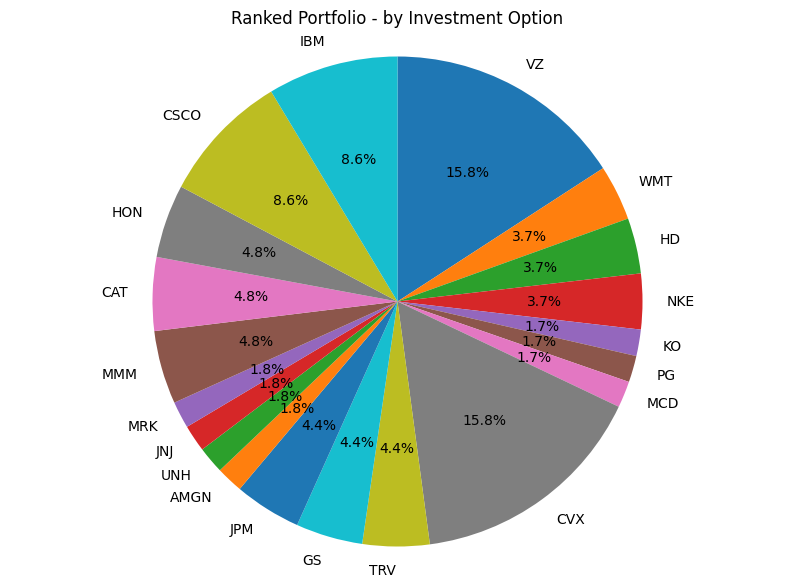

VZ     0.16
WMT    0.04
HD     0.04
NKE    0.04
KO     0.02
PG     0.02
MCD    0.02
CVX    0.16
TRV    0.04
GS     0.04
JPM    0.04
AMGN   0.02
UNH    0.02
JNJ    0.02
MRK    0.02
MMM    0.05
CAT    0.05
HON    0.05
CSCO   0.09
IBM    0.09



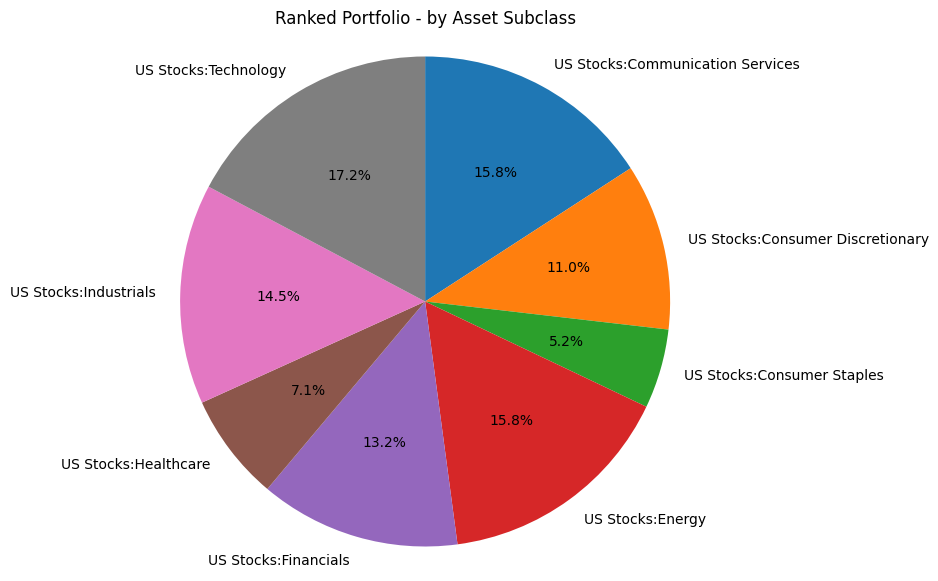

US Stocks:Communication Services   0.16
US Stocks:Consumer Discretionary   0.11
US Stocks:Consumer Staples         0.05
US Stocks:Energy                   0.16
US Stocks:Financials               0.13
US Stocks:Healthcare               0.07
US Stocks:Industrials              0.15
US Stocks:Technology               0.17



In [15]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [16]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    VZ                             0.1584
    CVX                            0.1582
    JNJ                            0.0177
    AMGN                           0.0177
    MRK                            0.0177
    KO                             0.0175
    IBM                            0.0862
    CSCO                           0.0862
    PG                             0.0175
    MCD                            0.0175
    HD                             0.0366
    GS                             0.0442
    NKE                            0.0366
    HON                            0.0484
    JPM                            0.0442
    MMM                            0.0484
    TRV                            0.0442
    UNH                            0.0177
    CAT                            0.0484
    WMT                            0.0366


### Optimize Portfolio

In [17]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [18]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).